In [1]:
from Funcoes import *
from tensorflow.keras.models import load_model

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['lines.linewidth'] = 2

In [4]:
model_2_sps = load_model('model_sps_2.h5')
model_4_sps = load_model('model_sps_4.h5')

In [5]:
M = 16        # ordem da modulação
Fb = 24e9      # taxa de símbolos
SpS = 4         # amostras por símbolo
Fs = SpS*Fb    # taxa de amostragem
rolloff = 0.05  # Rolloff do filtro formatador de pulso
amostras = 512
size = 50000

def data_test_to_obtain_BERxSNR_plot(model,data,X):
    X = MinMaxScaler().fit_transform(X)
    predictions = model.predict(X)
    predicted_signal = data['amplitudes']*np.exp(1j*predictions.reshape(-1,))
    return predicted_signal.reshape((1,-1))

In [9]:
SNRs = np.arange(16,40.1,0.5)
BERs = np.zeros(SNRs.size)
SpS = 4
if SpS == 4:
    model = model_4_sps
if SpS == 2:
    model = model_2_sps
for i , SNR in enumerate(SNRs):
    qam_signal = generate_signal(M,Fb,SpS,SNR,rolloff=0.05)
    sfm, A = qam_signal_phase_min(qam_signal)
    data,X,y = dataset_02(sfm,amostras,size)
    predicted_signal = data_test_to_obtain_BERxSNR_plot(model,data,X)
    reverted_signal = revert_sfm(predicted_signal,A)
    BERs[i] = reverted_signal[0,::SpS].cal_ber()

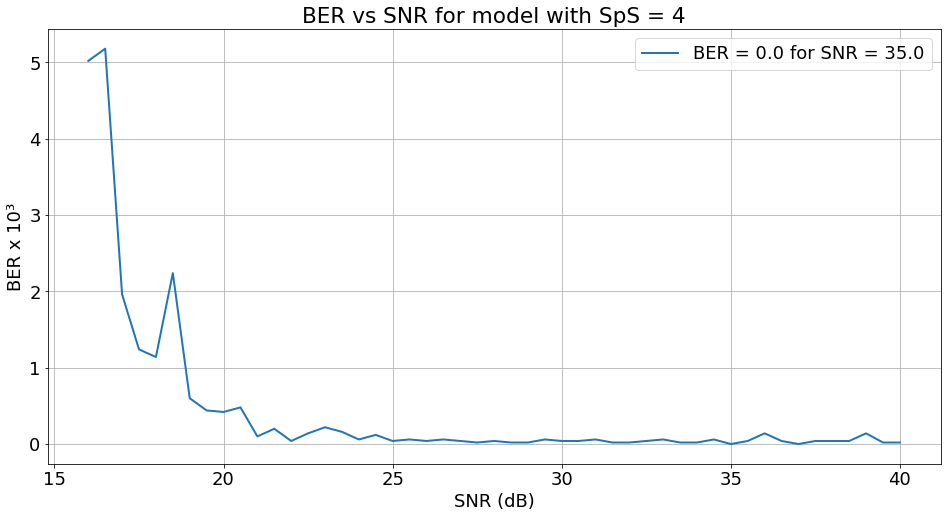

In [10]:
min_ber = np.argmin(BERs)
plt.plot(SNRs,BERs*1e3)
plt.title(f'BER vs SNR for model with SpS = {SpS}')
plt.xlabel('SNR (dB)')
plt.ylabel('BER x 10³')
plt.legend([f'BER = {BERs[min_ber]} for SNR = {SNRs[min_ber]}'])
plt.grid(True)
plt.savefig(f'BER_x_SNR_model_{SpS}_SpS.png')
np.savetxt(f'SNR_BER_model_{SpS}_sps.txt',[SNRs,BERs])

In [23]:
BERs[min_ber]

0.0003

In [26]:
SpS = 4
SNRs, BERs = np.loadtxt(f'SNR_BER_model_{SpS}_sps.txt')

In [12]:
qam_signal = generate_signal(M,Fb,SpS,30,rolloff=0.05)
sfm, A = qam_signal_phase_min(qam_signal)
data,X,y = dataset_02(sfm,amostras,size)
preds = data_test_to_obtain_BERxSNR_plot(model_2_sps,data,X)

In [13]:
preds.shape

(50000,)